In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Undrestanding the Dataset

### Load & Inspect Data

You can find the dataset [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [3]:
file_path = 'F:\AI Data Projects\Fintech Projects\Credit_Card_Fraud_Detection\data\creditcard.csv'

df = pd.read_csv(file_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


`Time`: Represents the time elapsed from the first transaction.

`V1` to `V28`: These are anonymized features obtained through Principal Component Analysis (PCA).

`Amount`: The transaction amount.

`Class`: The target variable (0 = legitimate transaction, 1 = fraudulent transaction).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are `284807` rows and `31` columns in the dataset.

We have `31` numerical features.

### Check for Missing Values

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values.

### Check for Class Imbalance

In [6]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True)*100)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


The target variable is highly imbalanced.

## EDA

### Summary Statistics

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Time Feature: The `Time` column has a wide range, indicating the time elapsed from the first transaction. It might need scaling.

PCA Features (V1 to V28): These are transformed values with a mean close to `0`, but they have different scales, which is expected from PCA.

Amount Feature: The mean transaction amount is `$88.35`, but the standard deviation is high (`250.12`), suggesting a need for scaling.

### Visualizing Data

C:\Users\user\AppData\Local\Temp\ipykernel_13204\230353511.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Time'], palette='coolwarm', kde=True, bins=50)


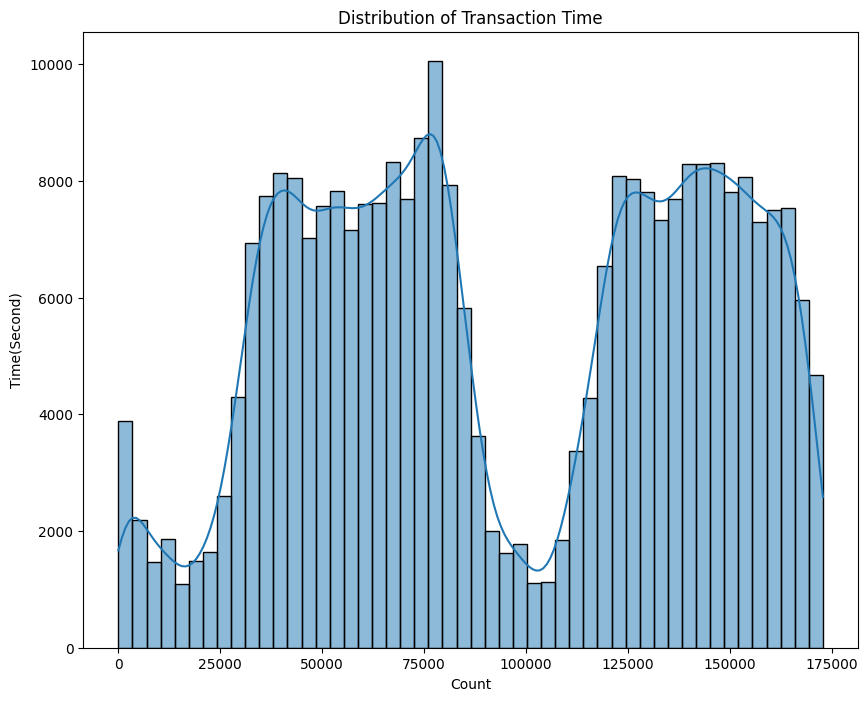

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(df['Time'], palette='coolwarm', kde=True, bins=50)
plt.title('Distribution of Transaction Time')
plt.xlabel('Count')
plt.ylabel('Time(Second)')
plt.show()

The `Time` feature shows a bimodal distribution (two peaks).

This suggests transactions happen in two distinct periods, likely representing business hours and non-business hours.

This pattern could be useful for feature engineering! 

C:\Users\user\AppData\Local\Temp\ipykernel_13204\2771590889.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Amount'], bins=30, kde=True, palette='coolwarm')


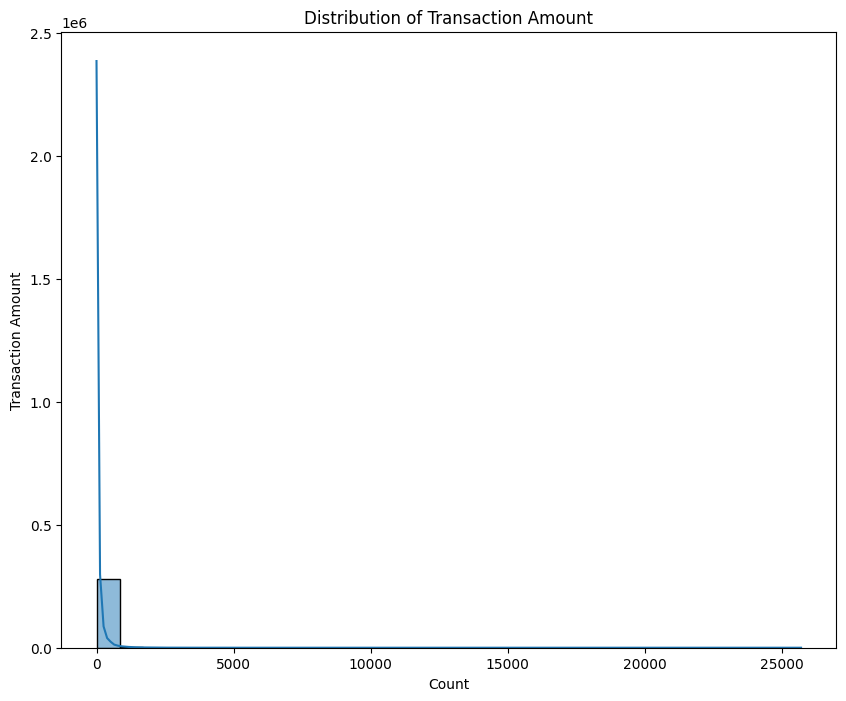

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(df['Amount'], bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Count')
plt.ylabel('Transaction Amount')
plt.show()

The `Amount` feature is highly skewed, meaning most transactions have small values, while a few are extremely large (outliers).

Fraudulent transactions might have different patterns compared to normal ones.

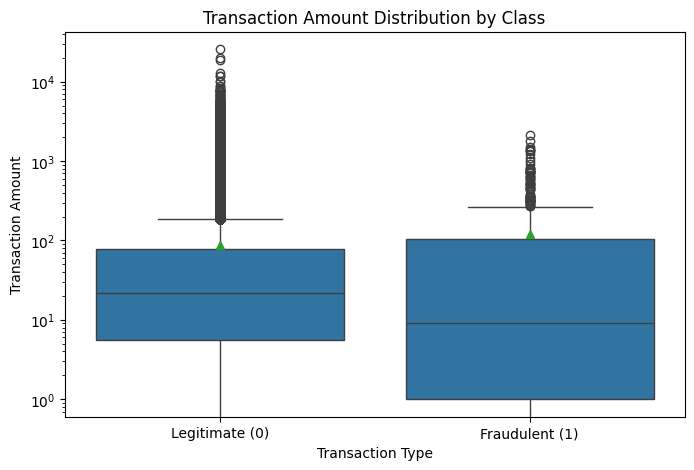

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Class"], y=df["Amount"], showfliers=True, showmeans=True)
plt.xticks(ticks=[0, 1], labels=["Legitimate (0)", "Fraudulent (1)"])
plt.xlabel("Transaction Type")
plt.yscale("log") 
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Distribution by Class")
plt.show()

There are `1081` duplicated rows.

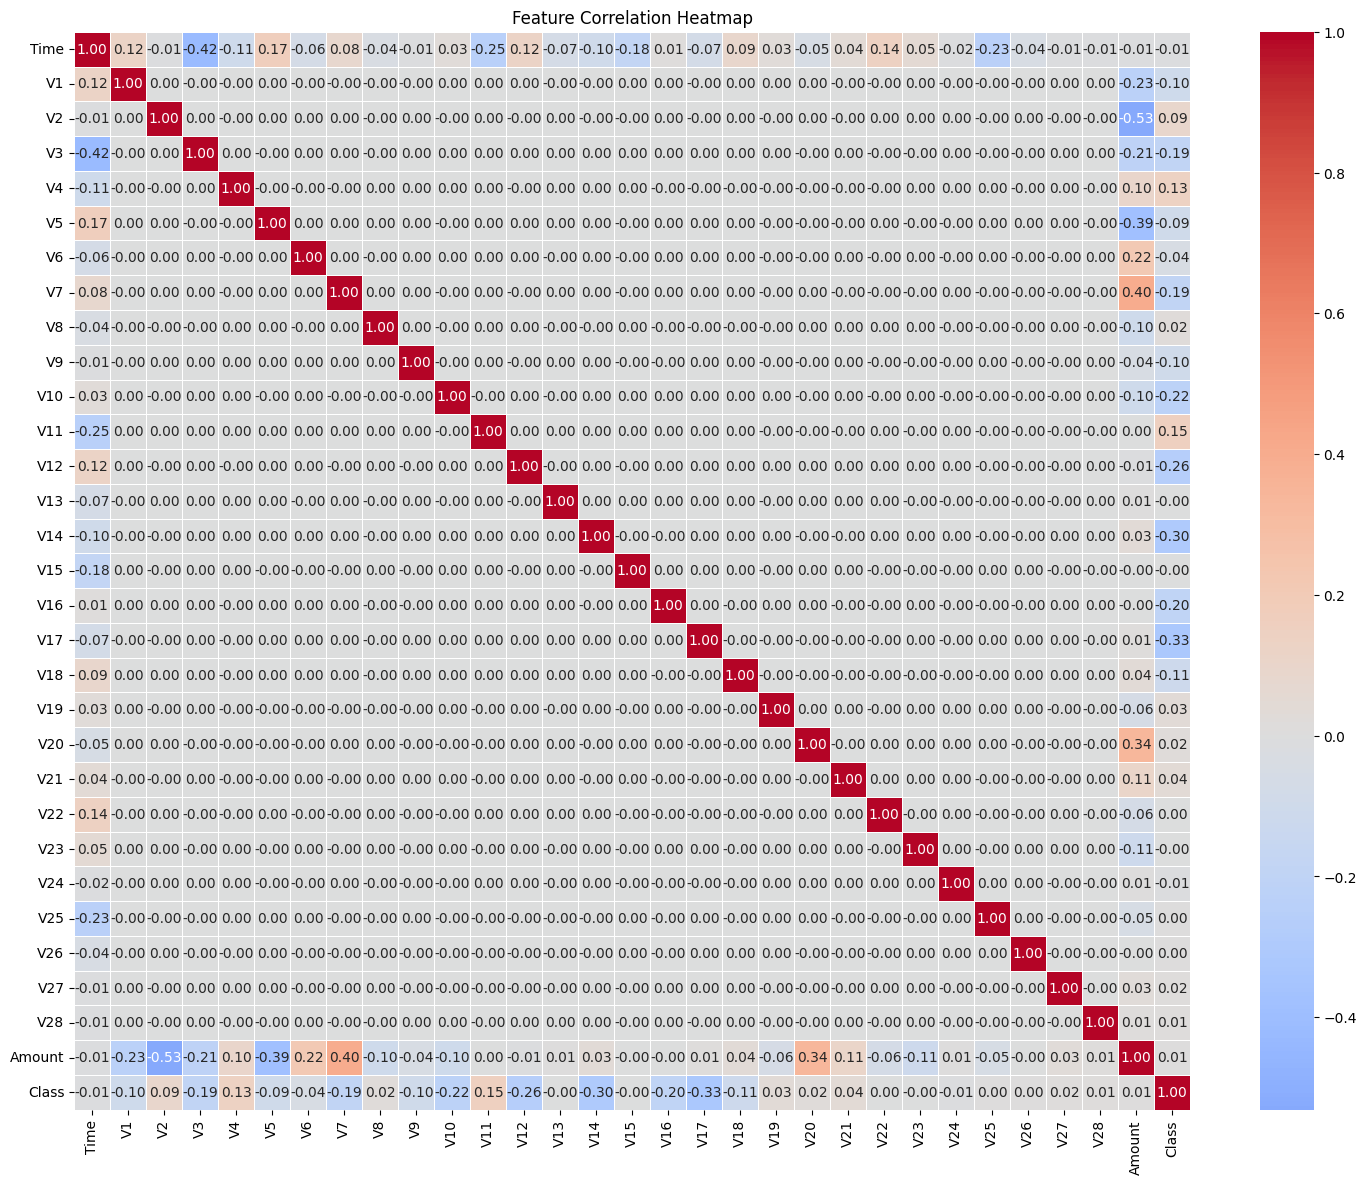

In [11]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, linewidths=0.5, annot=True, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap shows low correlation between most features.

No strong correlations between `Amount`, `Time`, and `Class` (fraud status).

Some `V` features show slight correlations, but since they are PCA-transformed, their real-world meaning is unknown.

### Checking for Duplicated

In [12]:
df.duplicated().sum()

np.int64(1081)

There are `1081` duplicated rows.

In [13]:
df[df.duplicated() & (df['Class'] == 1)].shape

(19, 31)

There are duplicated `19` rows which are fraud.

In [71]:
df.drop_duplicates()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Since only `19` of the duplicated rows were fraud and its too low, we droped the duplicated rows to reduce redundant.

## EDA

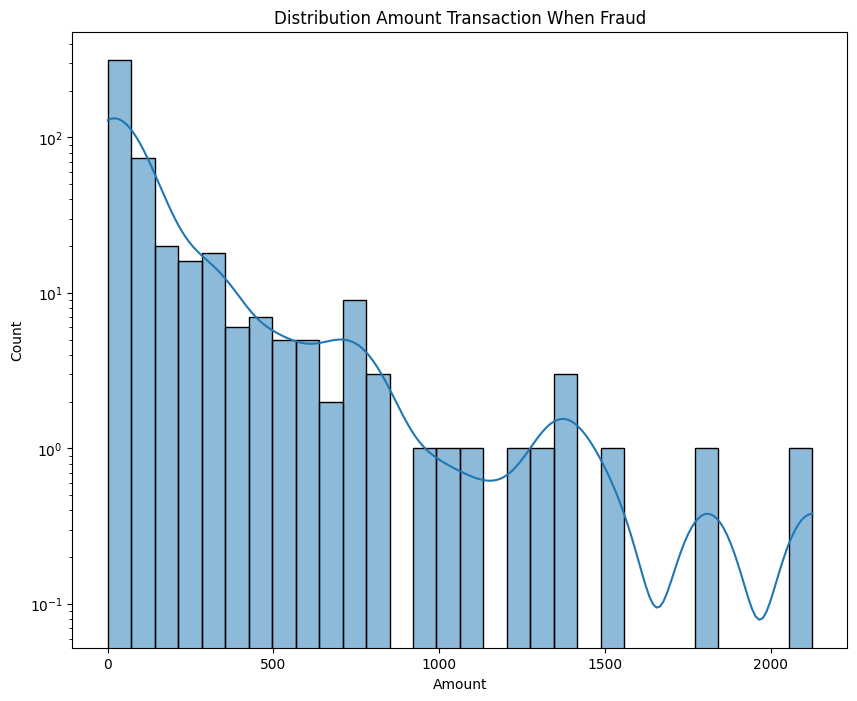

In [19]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['Class'] == 1]['Amount'], kde=True, bins=30)
plt.title('Distribution Amount Transaction When Fraud')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

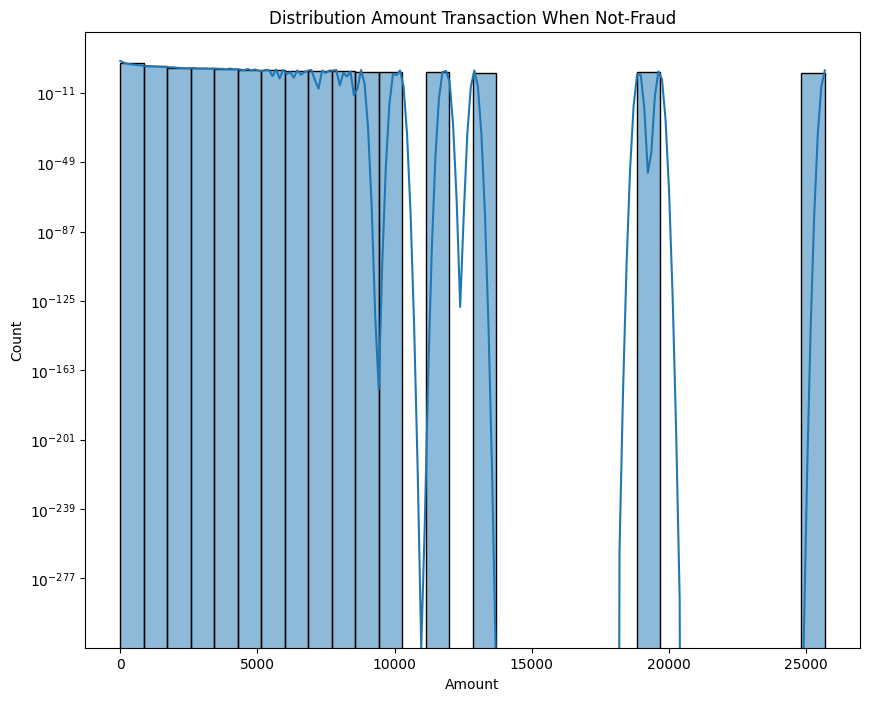

In [22]:
plt.figure(figsize=(10,8))
sns.histplot(df[df['Class'] == 0]['Amount'], kde=True, bins=30)
plt.title('Distribution Amount Transaction When Not-Fraud')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Fraudulent transactions tend to be smaller on average than non-fraud ones, but amount alone is not a strong fraud indicator.

Based on the heatmap correlation, `Amount` has low correlation with fraud.

This means we can’t rely on `Amount` alone to predict fraud—other factors (like `V` features) are likely more useful.

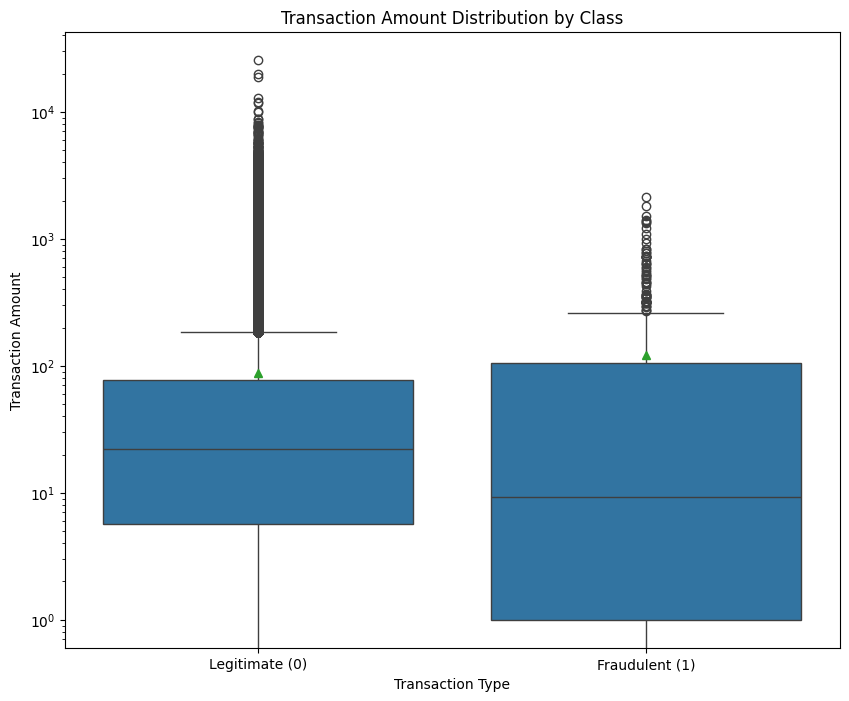

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['Class'], y=df['Amount'], showmeans=True)
plt.xticks(ticks=[0, 1], labels=["Legitimate (0)", "Fraudulent (1)"])
plt.xlabel("Transaction Type")
plt.yscale("log") 
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount Distribution by Class")
plt.show()

1. Both fraud and non-fraud transactions have a wide range of amounts.

    The median (middle line in the box) is similar for both.
    
    Fraud transactions tend to have slightly lower medians than non-fraud ones.

2. There are many outliers in both classes (black dots above the whiskers).

    Some very large transactions exist in both fraud and non-fraud categories.

    This means high transaction amounts do not necessarily indicate fraud.

3. The interquartile range (IQR) is slightly wider for fraudulent transactions.

    Fraudulent transactions have more variability in amounts.

    The spread of transaction amounts is larger for fraud cases compared to non-fraud ones.

In [34]:
df.corr()['Class'].abs().sort_values(ascending=False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

Here we can see the most important features.

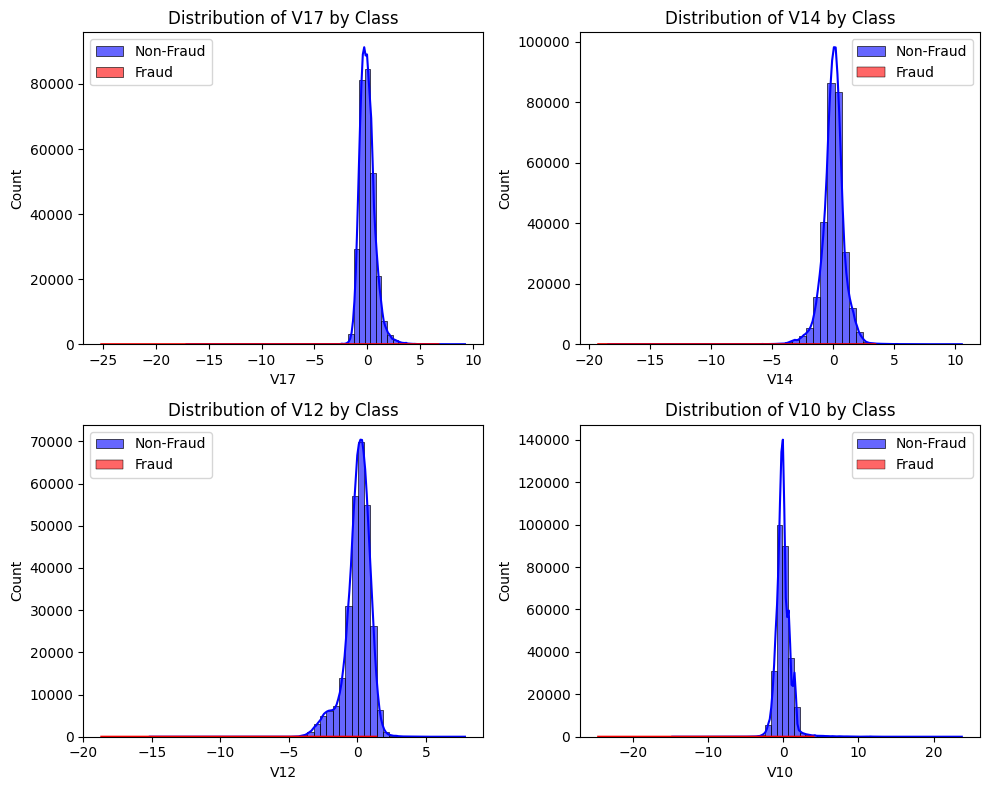

In [35]:
top4_important_features = ['V17', 'V14', 'V12', 'V10']
plt.figure(figsize=(10,8))

for i , col in enumerate(top4_important_features, 1):
     plt.subplot(2, 2, i)
     sns.histplot(df[df['Class'] == 0][col], color='blue', label='Non-Fraud', kde=True, bins=50, alpha=0.6)
     sns.histplot(df[df['Class'] == 1][col], color='red', label='Fraud', kde=True, bins=50, alpha=0.6)
     plt.title(f'Distribution of {col} by Class')
     plt.xlabel(col)
     plt.ylabel('Count')
     plt.legend()

plt.tight_layout()
plt.show()

1️. `V17`, `V14`, `V12`, and `V10` show clear separation between fraud and non-fraud.

    Fraud transactions (red) are shifted more towards negative values compared to non-fraud (blue).

    The difference is strongest in `V17` and `V14`.

2️. Fraud distributions have a wider spread.

    Fraud cases have a broader range of values, while non-fraud cases are concentrated around `0`.
    
    Example: Fraud cases in `V17` extend to `-25`, while non-fraud cases mostly stay near `0`.

3️. Non-fraud transactions are tightly clustered around `0`.

    This suggests that certain negative values in these features are strong indicators of fraud.

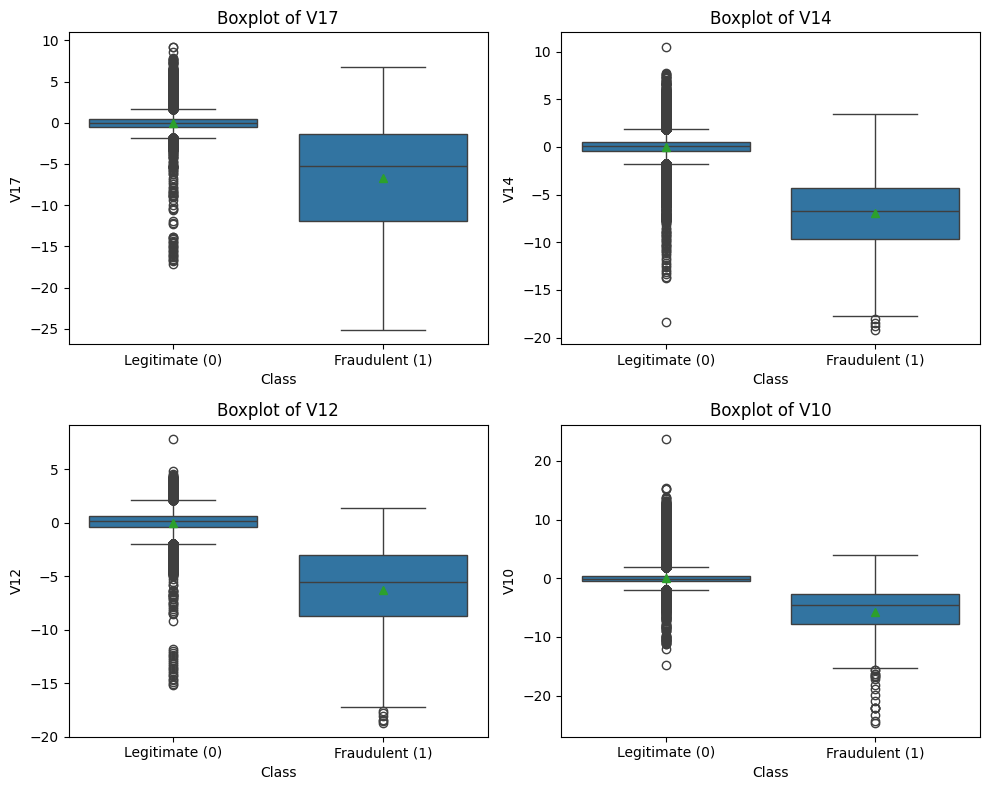

In [39]:
plt.figure(figsize=(10,8))

for i , col in enumerate(top4_important_features, 1):
     plt.subplot(2, 2, i)
     sns.boxplot(x=df['Class'], y=df[col] , showmeans=True)
     plt.title(f'Boxplot of {col}')
     plt.xticks(ticks=[0, 1], labels=["Legitimate (0)", "Fraudulent (1)"] )
     plt.xlabel('Class')
     plt.ylabel(col)

plt.tight_layout()
plt.show()

1️. Fraud transactions (Class = 1) have a distinct distribution for all four features (`V17`, `V14`, `V12`, `V10`).

    The medians (center lines in boxes) are significantly different between fraud and non-fraud transactions.
    
    Fraud transactions tend to be more negative than non-fraud in these features.

2️. Fraud transactions have a wider interquartile range (IQR).

    The box (middle `50%` of the data) is larger for fraud transactions, meaning more variation in fraudulent values.
    
    This suggests fraud cases are less concentrated around the median compared to non-fraud cases.

3️. Fraud transactions have extreme negative values.

    Many fraud transactions have outliers (black dots) extending into negative values, especially in `V17`, `V14`, and `V12`.

    This confirms that very negative values in these features are strong fraud indicators.

4️. Non-fraud transactions (Class = `0`) are tightly clustered around `0`.

    The boxes are smaller, meaning non-fraud transactions are more consistent and less spread out.

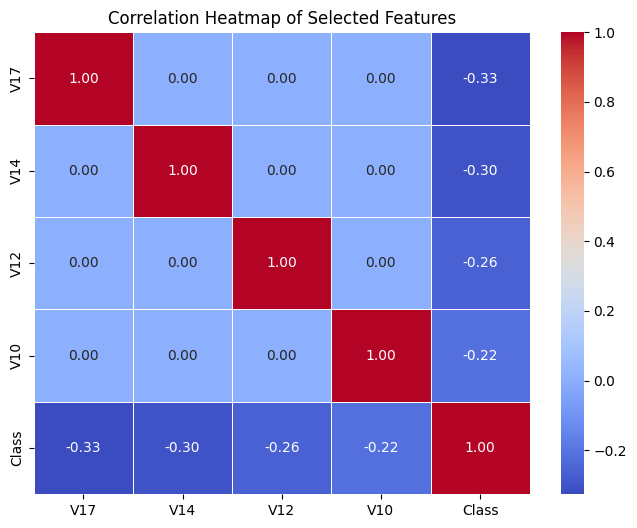

In [ ]:
important_features = ['V17', 'V14', 'V12', 'V10', 'Class']


correlation_matrix = df[important_features].corr()


plt.figure(figsize=(8,6)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)


plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [41]:
# Save the cleaned dataset
df.to_csv("../data/cleaned_creditcard.csv", index=False)